In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, f1_score


In [2]:
data=pd.read_csv('/content/creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192217 entries, 0 to 192216
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    192217 non-null  float64
 1   V1      192217 non-null  float64
 2   V2      192217 non-null  float64
 3   V3      192217 non-null  float64
 4   V4      192216 non-null  float64
 5   V5      192216 non-null  float64
 6   V6      192216 non-null  float64
 7   V7      192216 non-null  float64
 8   V8      192216 non-null  float64
 9   V9      192216 non-null  float64
 10  V10     192216 non-null  float64
 11  V11     192216 non-null  float64
 12  V12     192216 non-null  float64
 13  V13     192216 non-null  float64
 14  V14     192216 non-null  float64
 15  V15     192216 non-null  float64
 16  V16     192216 non-null  float64
 17  V17     192216 non-null  float64
 18  V18     192216 non-null  float64
 19  V19     192216 non-null  float64
 20  V20     192216 non-null  float64
 21  V21     19

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.isnull().count()

,0
Time,192217
V1,192217
V2,192217
V3,192217
V4,192217
V5,192217
V6,192217
V7,192217
V8,192217
V9,192217


In [6]:
data.fillna(0, inplace=True)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,...,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000,192217.000000
mean,68184.073844,-0.119304,0.008753,0.359554,0.084968,-0.127449,0.049838,-0.058504,0.021476,0.011041,...,-0.017208,-0.056032,-0.017506,0.005145,0.068107,0.007595,0.001424,0.002022,89.397211,0.001961
std,33047.933474,1.886963,1.621254,1.436355,1.394038,1.357808,1.307046,1.214078,1.212193,1.139361,...,0.737948,0.686026,0.606935,0.602863,0.485045,0.489192,0.394216,0.311640,248.537200,0.044244
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43474.000000,-0.967140,-0.574871,-0.270972,-0.782560,-0.795147,-0.705417,-0.579567,-0.176687,-0.662886,...,-0.227729,-0.539924,-0.169061,-0.339831,-0.230682,-0.331175,-0.066995,-0.039227,5.990000,0.000000
50%,65611.000000,-0.108100,0.085438,0.523250,0.086365,-0.183392,-0.214143,-0.016187,0.046201,-0.074981,...,-0.045361,-0.041928,-0.030531,0.054034,0.111704,-0.060692,0.006586,0.019058,22.860000,0.000000
75%,85905.000000,1.205997,0.785142,1.241678,0.900678,0.443664,0.446476,0.490721,0.340962,0.629574,...,0.145969,0.409593,0.111458,0.420349,0.387972,0.264033,0.089142,0.078122,79.000000,0.000000
max,129594.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Example dataset (X: features, y: target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before applying SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0.0: 153452, 1.0: 321})
After SMOTE: Counter({0.0: 153452, 1.0: 153452})


In [30]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


Random Forest


In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [32]:
rf_pred = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Performance:
Accuracy: 0.9997658932473208
ROC-AUC Score: 0.9731361362925914
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38388
         1.0       0.90      0.95      0.92        56

    accuracy                           1.00     38444
   macro avg       0.95      0.97      0.96     38444
weighted avg       1.00      1.00      1.00     38444



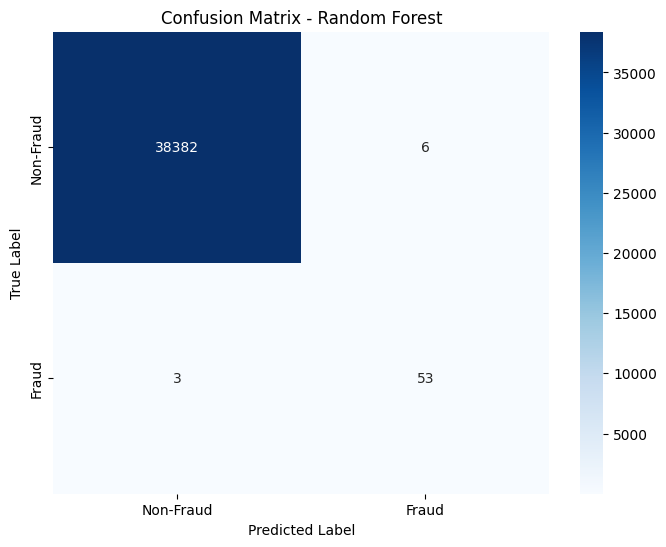

In [33]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


XGBoost

In [34]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
xgb_pred = xgb_model.predict(X_test)

# Evaluation
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


XGBoost Performance:
Accuracy: 0.9996618458016856
ROC-AUC Score: 0.9730840366781286
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38388
         1.0       0.84      0.95      0.89        56

    accuracy                           1.00     38444
   macro avg       0.92      0.97      0.95     38444
weighted avg       1.00      1.00      1.00     38444



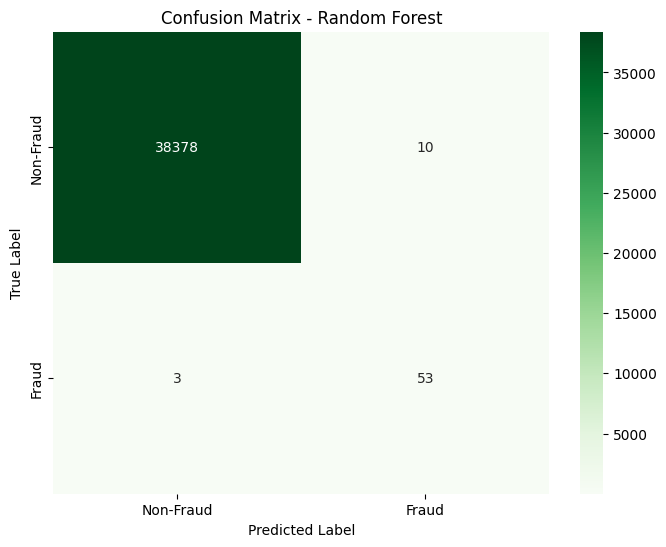

In [36]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Logistic Regression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [38]:
log_pred = log_reg.predict(X_test)

# Evaluation
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_pred))
print(classification_report(y_test, log_pred))



Logistic Regression Performance:
Accuracy: 0.9893611486837998
ROC-AUC Score: 0.967926174846306
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     38388
         1.0       0.12      0.95      0.21        56

    accuracy                           0.99     38444
   macro avg       0.56      0.97      0.60     38444
weighted avg       1.00      0.99      0.99     38444



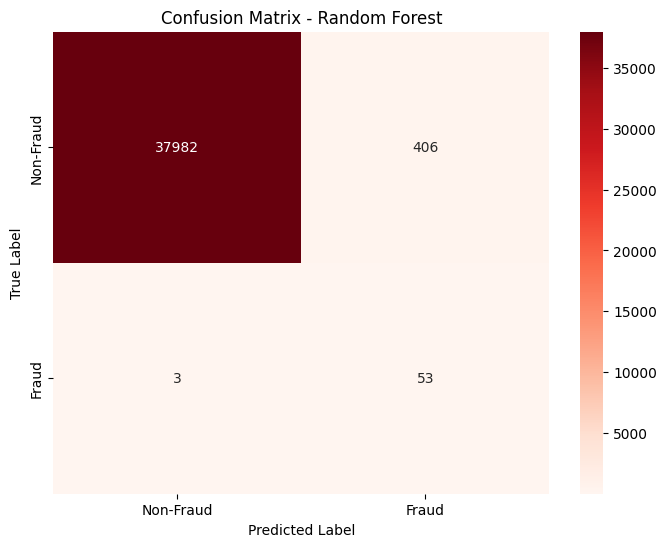

In [39]:
cm_log = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Comparing the three models- Random forest, XGBoost, Logistic Regression

In [40]:
models = ["Random Forest", "XGBoost", "Logistic Regression"]
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred), accuracy_score(y_test, log_pred)]
auc_scores = [roc_auc_score(y_test, rf_pred), roc_auc_score(y_test, xgb_pred), roc_auc_score(y_test, log_pred)]
f1scores = [f1_score(y_test, rf_pred), f1_score(y_test, xgb_pred), f1_score(y_test, log_pred)]

comparison_df = pd.DataFrame({"Model": models, "Accuracy": accuracies, "ROC-AUC": auc_scores, "F1-score": f1scores})
print("\nModel Performance Comparison:")
print(comparison_df)



Model Performance Comparison:
                 Model  Accuracy   ROC-AUC  F1-score
0        Random Forest  0.999766  0.973136  0.921739
1              XGBoost  0.999662  0.973084  0.890756
2  Logistic Regression  0.989361  0.967926  0.205825


Conclusion
*   Since fraud detection data contains an imbalance, SMOTE was used to balance the fradulent and non fradulent transactions.
*   Random forest model performs the best overall with a ROC-AUC (0.9731) indicating strong discriminatory power.
*   Although XGBoost was a close competitor for Random Forest. The F1 score and ROC-AUC show a slight difference indicating slightly less effectiveness than Random Forest in handling very small class imbalance.
*   Lastly, Logistic Regression performed poorly as compared to the other two with a low F1 score (0.205825). The probable reason to this is that fraud detection consists of complex patterns which the regression model may struggle in capturing(non linear patterns) than the tree based models.












